In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


<AxesSubplot:>

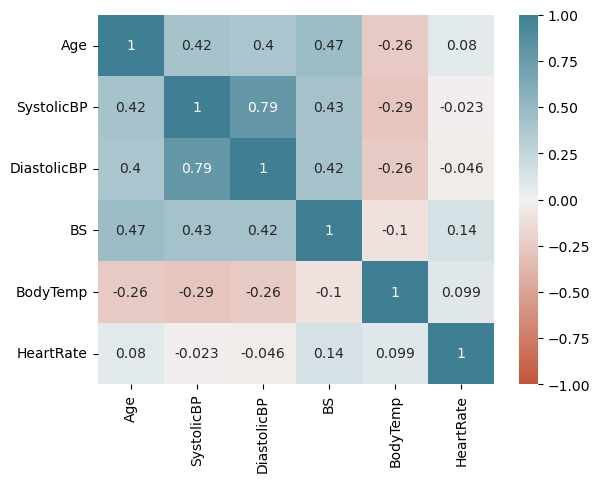

In [31]:
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [32]:
X = df.drop("RiskLevel", axis=1)
Y = df['RiskLevel']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [33]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

Text(0.5, 1.0, "Taux d'erreur en fonction de k pour un modèle Kppv donné")

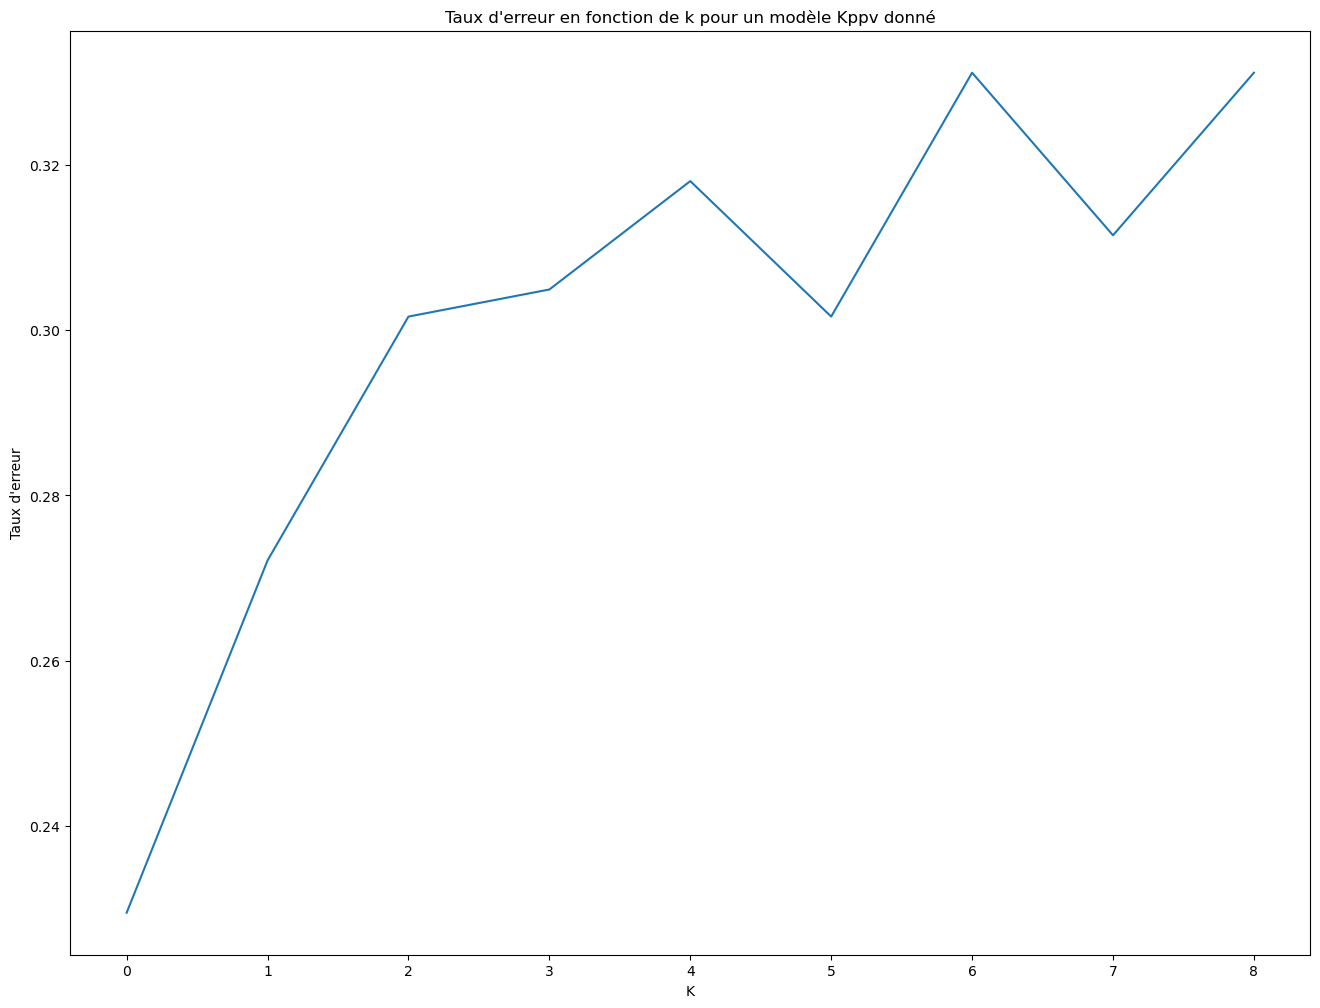

In [34]:
error_rates = []

for i in np.arange(1, 10):

    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train_scale, Y_train)
    new_predictions = new_model.predict(X_test_scale)
    error_rates.append(np.mean(new_predictions != Y_test))

plt.figure(figsize=(16,12))

plt.plot(error_rates)
plt.xlabel("K")
plt.ylabel("Taux d'erreur")
plt.title("Taux d'erreur en fonction de k pour un modèle Kppv donné")

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scale, Y_train)
knn_pred = knn.predict(X_test_scale)

In [36]:
print(classification_report(Y_test, knn_pred))


              precision    recall  f1-score   support

   high risk       0.91      0.90      0.90        89
    low risk       0.75      0.70      0.72       114
    mid risk       0.68      0.74      0.71       102

    accuracy                           0.77       305
   macro avg       0.78      0.78      0.78       305
weighted avg       0.77      0.77      0.77       305



D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Knn algorithm')

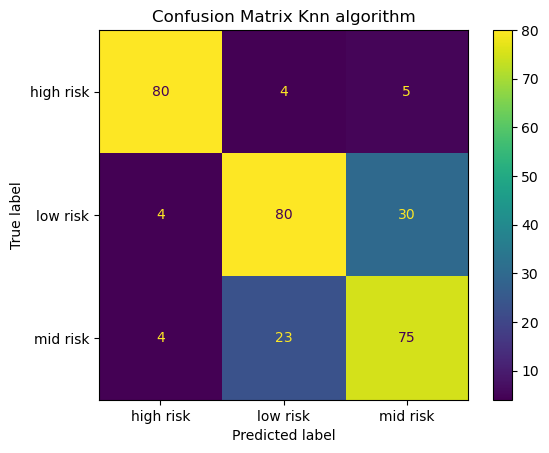

In [54]:
plot_confusion_matrix(knn, X_test_scale, Y_test)
plt.title('Confusion Matrix Knn algorithm')


In [38]:
X_scale = scaler.fit_transform(X)


In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scale)

KMeans(n_clusters=3)

In [40]:
df['RiskLevel']= df['RiskLevel'].replace(['high risk','mid risk','low risk'],[2,1,0])
df['target'] = kmeans.labels_
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,target
0,25,130,80,15.0,98.0,86,2,2
1,35,140,90,13.0,98.0,70,2,2
2,29,90,70,8.0,100.0,80,2,0
3,30,140,85,7.0,98.0,70,2,1
4,35,120,60,6.1,98.0,76,0,1


In [41]:
print(classification_report(df['RiskLevel'], df['target']))

              precision    recall  f1-score   support

           0       0.48      0.38      0.43       406
           1       0.39      0.59      0.47       336
           2       0.80      0.54      0.65       272

    accuracy                           0.50      1014
   macro avg       0.56      0.51      0.52      1014
weighted avg       0.54      0.50      0.50      1014



Text(95.72222222222221, 0.5, 'True Label')

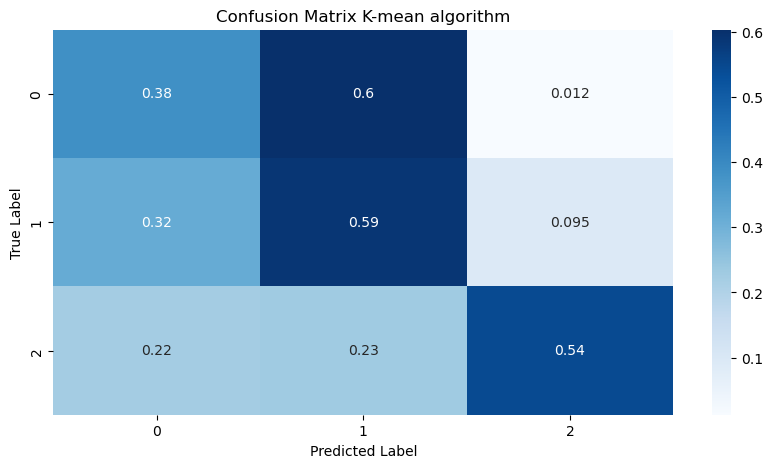

In [51]:
fig = plt.figure(figsize = (10,5))
cf_matrix = confusion_matrix(df['RiskLevel'],df['target'])
cf_matrix = preprocessing.normalize(cf_matrix, axis=1, norm='l1')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

plt.title('Confusion Matrix K-mean algorithm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')